In [1]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9dd84cf97c4fc16956f39829c81f3b6907c8fc83-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9dd84cf97c4fc16956f39829c81f3b6907c8fc83-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [30]:
q0 = [1., 0., 0., 0., 0., 0., 0.00]
v0 = [0., 0., 0., 25., 0. , 0.]
N = 15

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] = 0.

println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=true);

Implicit Contacts


elapsed time: 43.140933218 seconds
elapsed time: 0.207159816 seconds
elapsed time: 0.243591339 seconds
elapsed time: 0.227263027 seconds
elapsed time: 0.226158604 seconds
elapsed time: 0.226787666 seconds
elapsed time: 0.226506373 seconds
elapsed time: 0.237106443 seconds
elapsed time: 0.227652556 seconds
elapsed time: 0.238790235 seconds
elapsed time: 0.227604756 seconds
elapsed time: 0.227653528 seconds
elapsed time: 0.225081531 seconds
elapsed time: 0.226276396 seconds
elapsed time: 0.228734868 seconds
elapsed time: 0.239385193 seconds
elapsed time: 0.228144509 seconds
elapsed time: 0.225902477 seconds
elapsed time: 0.227660983 seconds
elapsed time: 0.227450302 seconds
elapsed time: 0.238897179 seconds
elapsed time: 0.227149472 seconds
elapsed time: 0.227597823 seconds
elapsed time: 0.226874279 seconds
elapsed time: 0.225917345 seconds
elapsed time: 0.226984419 seconds
elapsed time: 0.226886994 seconds
Infeasible_Problem_Detected
elapsed time: 0.220521443 seconds
elapsed time: 0.227

elapsed time: 0.228294101 seconds
elapsed time: 0.238446021 seconds
elapsed time: 0.229113895 seconds
elapsed time: 0.237933438 seconds
elapsed time: 0.237083147 seconds
elapsed time: 0.227805685 seconds
elapsed time: 0.225396366 seconds
elapsed time: 0.236364995 seconds
elapsed time: 0.226472707 seconds
elapsed time: 0.237018914 seconds
elapsed time: 0.22584686 seconds
elapsed time: 0.236999798 seconds
elapsed time: 0.227263426 seconds
Infeasible_Problem_Detected
elapsed time: 0.220824026 seconds
elapsed time: 0.226231779 seconds
elapsed time: 0.236803246 seconds
elapsed time: 0.227345121 seconds
elapsed time: 0.238181229 seconds
elapsed time: 0.237363568 seconds
elapsed time: 0.226438442 seconds
elapsed time: 0.225162403 seconds
elapsed time: 0.225918886 seconds
elapsed time: 0.231092386 seconds
elapsed time: 0.23666282 seconds
elapsed time: 0.228138856 seconds
elapsed time: 0.226310309 seconds
elapsed time: 0.237516428 seconds
elapsed time: 0.227472713 seconds
elapsed time: 0.239053

In [31]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded
Solve_Succeeded


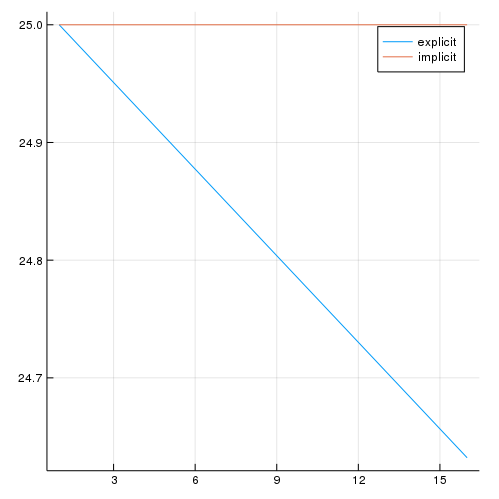

In [32]:
ts = cumsum([Δt for i in 1:N]);
j = 11
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")

In [ ]:
traj_imp